# Are There Too Many Computer Science Students?
Harry Wang & Nitish Sharma

**Introduction**

In the ever-evolving digital age, the field of Computer Science has seen an unprecedented surge in popularity. Aspiring innovators and problem solvers across the globe are increasingly drawn to this discipline, seeking to leave their mark on the world through code and computation. But this raises a pertinent question: Are there too many Computer Science students?

In 2022, data from the U.S. Department of Education shows that Univeristy of Maryland-College Park has awarded the most degrees in Computer Science in the U.S. Fast forward to 2023, major tech giants IBM, Google, Microsoft, and Apple all announced major layoffs and hiring freeze.

The rise of social media and tech influencers has painted a picture of Computer Science as the golden ticket to success. But is this gold rush leading us towards an oversaturated market? Our mission today is to delve into the data and unravel the truth behind this question: Are we in the midst of a Computer Science student boom?

# Data Collection
Our initial step involves scouring the web for relevant data. It's crucial that we obtain data from credible sources, such as the U.S. Department of Education. However, given the vast volume of data provided by the U.S. Department of Education, we'll streamline our analysis by focusing on the top 20 Computer Science schools as ranked by U.S. News. This approach allows us to maintain the integrity of our data while simplifying our analysis.





In [186]:
#imports
import pandas as pd

Rather than manually tidying the outdated and disorganized data provided by the U.S. Department of Education, we'll source our data from Data USA. This platform enables us to collect, analyze, and visualize shared U.S. government data without the hassle of cleaning up the messy database from the U.S. Department of Education.

In addition, we'll utilize a CSV file named 'top20'. This data was compiled using the rankings provided by U.S. News. Unfortunately, we were unable to scrape the data using Beautiful Soup, so we resorted to manually compiling the data. This hands-on approach, while labor-intensive, ensures the accuracy and completeness of our dataset.

In [187]:
# load CSV files
institutions = pd.read_csv("Institutions.csv")
enrollment1 = pd.read_csv("Full-Time vs Part-Time Enrollment.csv")
enrollment2 = pd.read_csv("Full-Time vs Part-Time Enrollment 2.csv")
enrollment3 = pd.read_csv("Full-Time vs Part-Time Enrollment 3.csv")
enrollment4 = pd.read_csv("Full-Time vs Part-Time Enrollment 4.csv")
enrollment5 = pd.read_csv("Full-Time vs Part-Time Enrollment 5.csv")
enrollment6 = pd.read_csv("Full-Time vs Part-Time Enrollment 6.csv")
enrollment7 = pd.read_csv("Full-Time vs Part-Time Enrollment 7.csv")
enrollment8 = pd.read_csv("Full-Time vs Part-Time Enrollment 8.csv")
enrollment9 = pd.read_csv("Full-Time vs Part-Time Enrollment 9.csv")
enrollment10 = pd.read_csv("Full-Time vs Part-Time Enrollment 10.csv")
enrollment11 = pd.read_csv("Full-Time vs Part-Time Enrollment 11.csv")
austin_df = pd.read_csv("Majors Awarded.csv")
ann_arbor_df = pd.read_csv("Majors Awarded 2.csv")
top20 = pd.read_csv("top20.csv")


# Data Processing and Data Cleaning

Processing and cleaning the data by renaming the columns, merging the dataframes, filling out missing values though cold imputation, and prevent duplicate values during merging.

In [188]:
# Rename the 'INSTNM' column in the top20 dataframe to 'University'
top20 = top20.rename(columns={'INSTNM': 'University'})

name_changes = {
    'Massachusetts Institute of Technology (166683)': 'Massachusetts Institute of Technology',
    'University of California-Los Angeles (110662)': 'University of California-Los Angeles',
    'University of California-San Diego (110680)': 'University of California-San Diego'
}

# Replace the university names in the 'University' column
institutions['University'] = institutions['University'].replace(name_changes)
enrollment1['University'] = enrollment1['University'].replace(name_changes)
enrollment2['University'] = enrollment2['University'].replace(name_changes)
enrollment3['University'] = enrollment3['University'].replace(name_changes)
enrollment4['University'] = enrollment4['University'].replace(name_changes)
enrollment5['University'] = enrollment5['University'].replace(name_changes)
enrollment6['University'] = enrollment6['University'].replace(name_changes)
enrollment7['University'] = enrollment7['University'].replace(name_changes)
enrollment8['University'] = enrollment8['University'].replace(name_changes)
enrollment9['University'] = enrollment9['University'].replace(name_changes)
enrollment10['University'] = enrollment10['University'].replace(name_changes)
enrollment11['University'] = enrollment11['University'].replace(name_changes)

# Filter the austin_df and ann_arbor_df DataFrames
austin_df = austin_df[austin_df['CIP2'] == 'Computer and Information Sciences and Support Services']
ann_arbor_df = ann_arbor_df[ann_arbor_df['CIP2'] == 'Computer and Information Sciences and Support Services']

# Fill out missing values using Cold Imputation
institutions = pd.concat([institutions, austin_df, ann_arbor_df], ignore_index=True)

# Merge the institutions DataFrame with the institutions DataFrame
merged_df = pd.merge(top20, institutions[['University', 'Year', 'Completions']], on='University', how='left')

# Concatenate enrollment1 to enrollment11 DataFrames
enrollment = pd.concat([enrollment1, enrollment2, enrollment3, enrollment4, enrollment5, enrollment6, enrollment7, enrollment8, enrollment9, enrollment10, enrollment11], ignore_index=True)

# Group the enrollment DataFrame by 'University' and 'Year' and sum the 'Enrollment' values
enrollment_grouped = enrollment.groupby(['University', 'Year'])['Enrollment'].sum().reset_index()

# Merge the merged_df DataFrame with the grouped enrollment DataFrame
merged_df = pd.merge(merged_df, enrollment_grouped, on=['University', 'Year'], how='left')

merged_df


,RANK,University,Year,Completions,Enrollment
0,1,Carnegie Mellon University,2022,364,16002
1,1,Carnegie Mellon University,2021,340,15057
2,1,Carnegie Mellon University,2020,341,13519
3,1,Carnegie Mellon University,2019,286,14180
4,1,Carnegie Mellon University,2018,273,14029
...,...,...,...,...,...
218,20,University of Pennsylvania,2016,81,24960
219,20,University of Pennsylvania,2015,121,24876
220,20,University of Pennsylvania,2014,101,24806
221,20,University of Pennsylvania,2013,71,24630


# Data Exploration and Analysis

Let's begin by plotting the annual count of CS degrees awarded by each university.

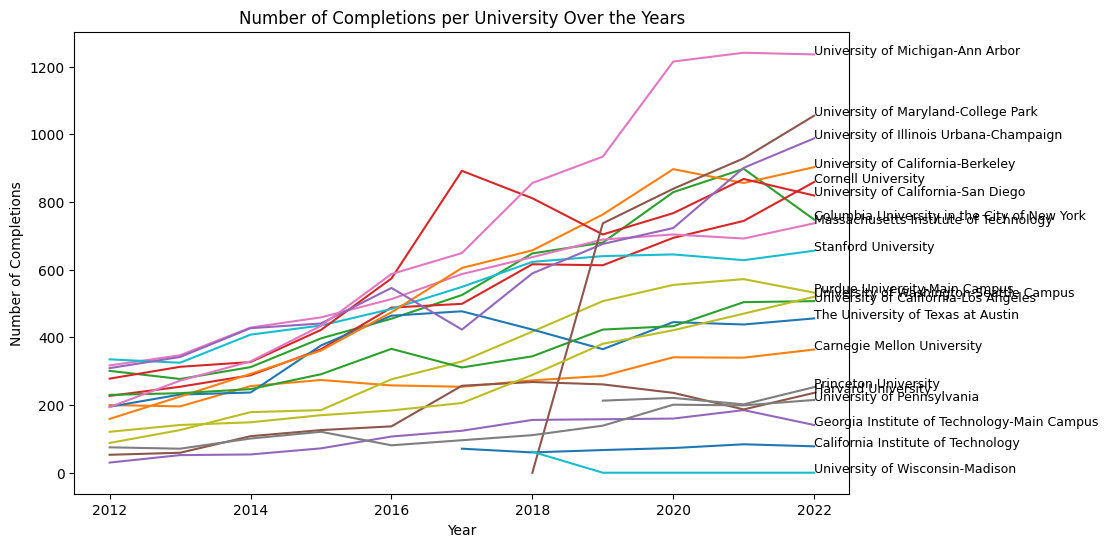

In [189]:
import matplotlib.pyplot as plt

# Group by University and Year, then sum the Completions
grouped_df = merged_df.groupby(['University', 'Year'])['Completions'].sum().reset_index()

# Get the unique universities
universities = grouped_df['University'].unique()

plt.figure(figsize=(10, 6))

for university in universities:
    uni_data = grouped_df[grouped_df['University'] == university]
    plt.plot(uni_data['Year'], uni_data['Completions'])
    plt.text(uni_data['Year'].values[-1], uni_data['Completions'].values[-1], university, fontsize=9)

plt.title('Number of Completions per University Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Completions')
plt.show()

The graph clearly illustrates an upward trend in the number of Computer Science (CS) degrees awarded throughout the year. However, there are some anomalies worth noting. For instance, certain universities lack sufficient data, and the University of Michigan stands out as an outlier.

During the data processing and cleaning phase, we discovered that two universities were absent from the initial CSV file. This necessitated a search for individual CSV files for these institutions. Regrettably, these files did not contain data on the completion of CS degrees, but rather on Computer and Informational Science degrees. This discrepancy accounts for the outlier status of the University of Michigan.

If we disregard the outlier, it becomes evident that the University of Maryland awards the highest number of CS degrees. However, this observation doesn't provide a comprehensive view, as the graph doesn't factor in the ratio of CS degree recipients to the total student enrollment.

Public universities often have larger student bodies than private institutions, which could explain why the University of Maryland confers so many degrees. To gain a more nuanced understanding, we can employ feature engineering to create an additional column in our dataset. This column would calculate the proportion of CS graduates relative to the total enrollment, offering a more balanced perspective on the distribution of CS degrees.

In [190]:
merged_df['Completion_Ratio'] = merged_df['Completions'] / merged_df['Enrollment']

merged_df

,RANK,University,Year,Completions,Enrollment,Completion_Ratio
0,1,Carnegie Mellon University,2022,364,16002,0.022747
1,1,Carnegie Mellon University,2021,340,15057,0.022581
2,1,Carnegie Mellon University,2020,341,13519,0.025224
3,1,Carnegie Mellon University,2019,286,14180,0.020169
4,1,Carnegie Mellon University,2018,273,14029,0.019460
...,...,...,...,...,...,...
218,20,University of Pennsylvania,2016,81,24960,0.003245
219,20,University of Pennsylvania,2015,121,24876,0.004864
220,20,University of Pennsylvania,2014,101,24806,0.004072
221,20,University of Pennsylvania,2013,71,24630,0.002883


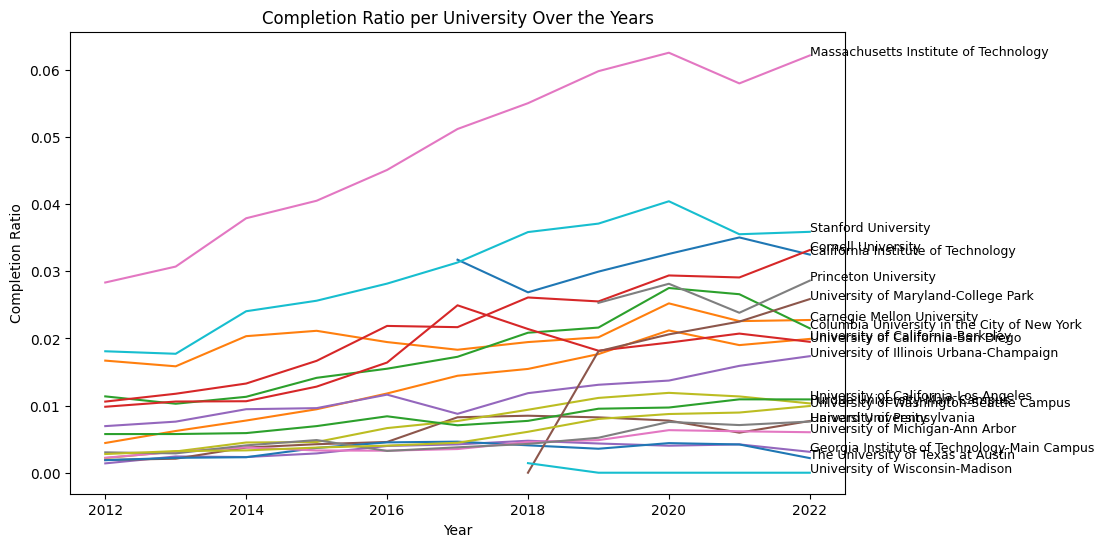

In [191]:
# Group by University and Year, then calculate the Completion_Ratio
grouped_df = merged_df.groupby(['University', 'Year'])['Completion_Ratio'].mean().reset_index()

# Get the unique universities
universities = grouped_df['University'].unique()

plt.figure(figsize=(10, 6))

for university in universities:
    uni_data = grouped_df[grouped_df['University'] == university]
    plt.plot(uni_data['Year'], uni_data['Completion_Ratio'])

    # Add the university name at the end of the line
    plt.text(uni_data['Year'].values[-1], uni_data['Completion_Ratio'].values[-1], university, fontsize=9)

plt.title('Completion Ratio per University Over the Years')
plt.xlabel('Year')
plt.ylabel('Completion Ratio')
plt.show()

Upon plotting the ratio of CS degree recipients to total enrollment, a different picture emerges. The Massachusetts Institute of Technology now takes the lead, and the previous outlier, the University of Michigan, no longer appears as an anomaly.

This shift in rankings underscores the importance of considering the size of the student body when evaluating the number of degrees awarded. While the University of Maryland conferred the most CS degrees in absolute terms, MIT surpasses it when we account for the size of the student population. This suggests that MIT has a higher concentration of CS students among its enrollees.

The upward trend in the ratio is suggesting that the concentration of CS students is growing among universities.

From looking at the graph, it appears that some higher ranking schools appears to have high concentration of CS population. To test this we can use

Pearson Correlation Coefficient: -0.5030488255522989


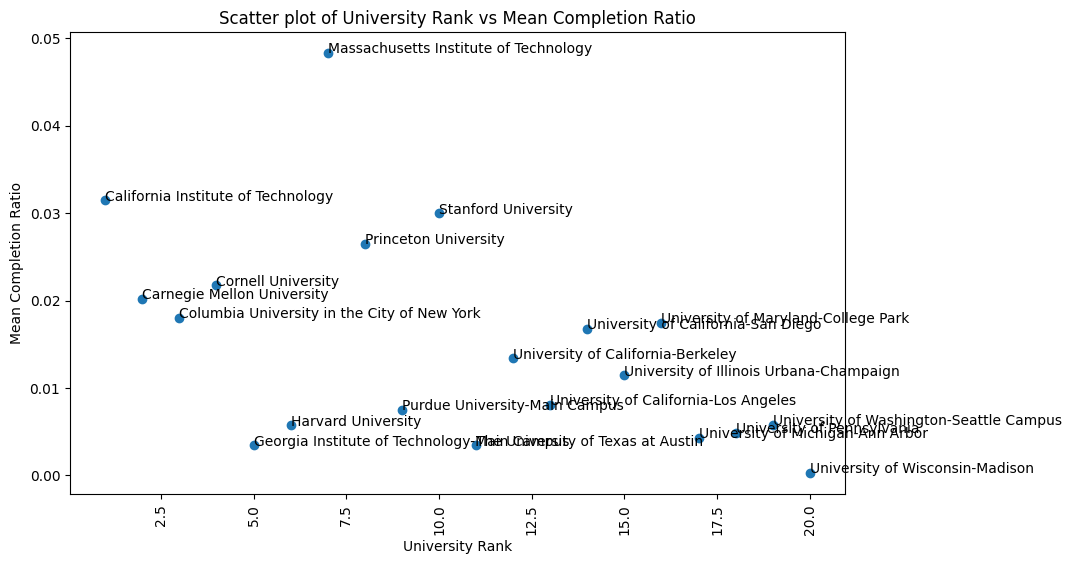

In [192]:
# Calculate the mean completion ratio for each university
mean_ratios = grouped_df.groupby('University')['Completion_Ratio'].mean().reset_index()

# Calculate the correlation
correlation = mean_ratios['University'].rank().corr(mean_ratios['Completion_Ratio'])
print(f"Pearson Correlation Coefficient: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(mean_ratios['University'].rank(), mean_ratios['Completion_Ratio'])

for i in range(len(mean_ratios)):
    plt.annotate(mean_ratios['University'].iloc[i], (mean_ratios['University'].rank().iloc[i], mean_ratios['Completion_Ratio'].iloc[i]))

plt.xlabel('University Rank')
plt.ylabel('Mean Completion Ratio')
plt.xticks(rotation=90)
plt.title('Scatter plot of University Rank vs Mean Completion Ratio')
plt.show()

In our scatter plot analysis, we observe an unexpected yet moderately negative linear relationship between university rank and the mean completion ratio. This relationship is further substantiated by the Pearson Correlation Coefficient, which is calculated to be approximately -0.503. As this value lies between 0 and -1, it indicates a moderate strength of this negative correlation.

# Machine learning analysis

Now let's build a regression model to predict the growth of CS degree completion. For simplicity we will just do Carnegie Mellon University.

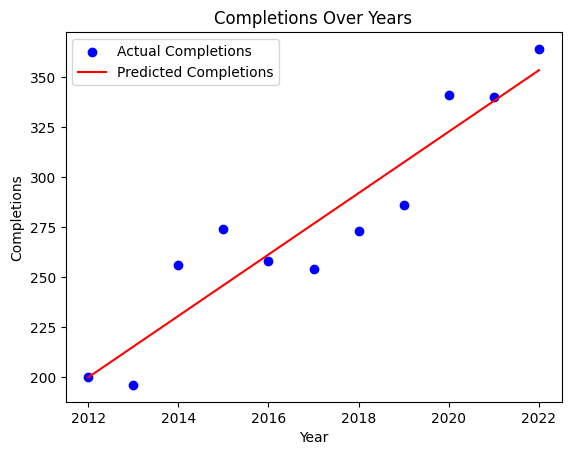

In [193]:
from sklearn.linear_model import LinearRegression

cmu_df = merged_df[merged_df['University'] == 'Carnegie Mellon University']
cmu_df

X = cmu_df[['Year']]
y = cmu_df['Completions']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual Completions')
plt.plot(X, y_pred, color='red', label='Predicted Completions')
plt.xlabel('Year')
plt.ylabel('Completions')
plt.title('Completions Over Years')
plt.legend()
plt.show()

The curve appears to fit the data moderately well, which suggests that the number of Computer Science students is likely to continue to increase, albeit at a steady linear rate.

In [194]:
slope = model.coef_[0]

cmu_df = cmu_df.sort_values('Year')
cmu_df['YoY_Change'] = cmu_df['Completions'].pct_change() * 100

avg_pct_growth_rate = cmu_df['YoY_Change'].mean()
print(f"Growth Rate: {avg_pct_growth_rate}%")

Growth Rate: 6.6492248593416665%


It seems that the annual growth rate is approximately 6.65%. However, according to Data USA, the Computer Science workforce is expanding at a rate of 5.13%. If this trend continues, it appears that there will be more Computer Science students than available positions in the workforce.

# Conclusion

However, this conclusion is based on a single data point and therefore, should be interpreted with caution. A comprehensive analysis of multiple institutions is necessary to draw a definitive conclusion about the saturation of the Computer Science field.

Moreover, the layoffs and hiring freezes announced by major tech giants in 2023 could be a contributing factor to the perceived disruption in the field. These events could be a result of the mass hiring that occurred during the pandemic, rather than an indication of an oversaturated market.

In conclusion, while there are signs of a potential mismatch between the number of Computer Science graduates and available jobs, we need more data to be certain. The situation is complex and influenced by many factors, so a deeper look into the field is necessary.